<a href="https://colab.research.google.com/github/jaybakky2013/Statistics/blob/main/FKND_MODELS_STATISTICAL_TEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STATISTICAL TEST FOR COMPARISM OF BERT MODELS WITH LIAR DATASET


> By Barakat Jayeola Akinsanya



In [ ]:
import pandas as pd
from matplotlib import pyplot
from scipy.stats import normaltest
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import ks_2samp


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Read The Predictions From BERT Base and BERT large.

In [ ]:
results =pd.DataFrame()
results['base'] = pd.read_csv('bertbasee.csv', header=None).values[:, 1]
results['large'] = pd.read_csv('bertlarge.csv', header=None).values[:, 1]

Descriptive Statistics

            base      large
count  22.000000  22.000000
mean    2.181818   1.727273
std     1.763016   1.638287
min     0.000000   0.000000
25%     1.000000   1.000000
50%     2.000000   1.000000
75%     3.000000   2.750000
max     5.000000   5.000000


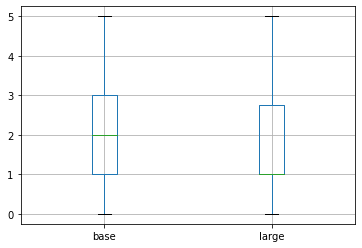

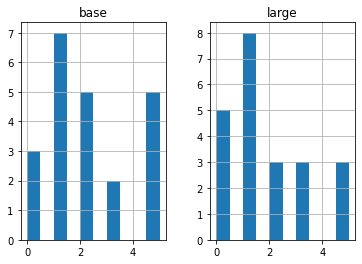

In [ ]:
print(results.describe())
# box and whisker plot
results.boxplot()
pyplot.show()
# histogram
results.hist()
pyplot.show()

Q-Q Plot for Visualization of the Data to test for Normality

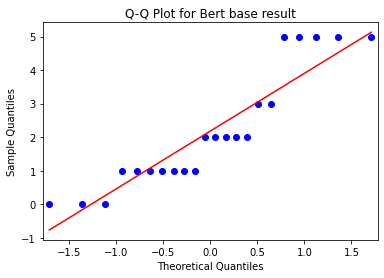

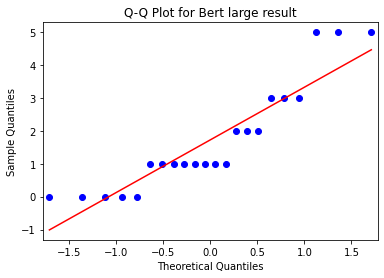

In [ ]:
qqplot(results['base'], line='s')
pyplot.title("Q-Q Plot for Bert base result")
pyplot.show()
qqplot(results['large'], line='s')
pyplot.title("Q-Q Plot for Bert large result")
pyplot.show()

Shapiro-Wilk Test for Normality of the Predictions result from BERT base



> H0: Sample looks Gaussian

> H1: Sample does not look Gaussian





In [ ]:


stat, p = shapiro(results['base'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.843, p=0.003
Sample does not look Gaussian (reject H0)


Shapiro-Wilk Test for Normality of the Predictions result from BERT large



> H0: Sample looks Gaussian

> H1: Sample does not look Gaussian



In [ ]:

stat, p = shapiro(results['large'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.839, p=0.002
Sample does not look Gaussian (reject H0)



Calculate the significance using Kolmogorov–Smirnov test



> H0 : difference between the two populations is not significant.


> H1 : difference between the two populations is significant.






In [ ]:

value, pvalue = ks_2samp(results['base'], results['large'])
print(value, pvalue)
if pvalue > 0.05:
	print('Samples are likely drawn from the same distributions (fail to reject H0)')
else:
	print('Samples are likely drawn from different distributions (reject H0)')

0.13636363636363635 0.9900571661472556
Samples are likely drawn from the same distributions (fail to reject H0)


The p-value is large, suggesting a near certainty that the difference between the two populations is not significant.